In [ ]:
import tensorflow as tf
import keras
import numpy as np

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"NumPy version: {np.__version__}")


TensorFlow version: 2.18.0
Keras version: 3.8.0
NumPy version: 1.26.0


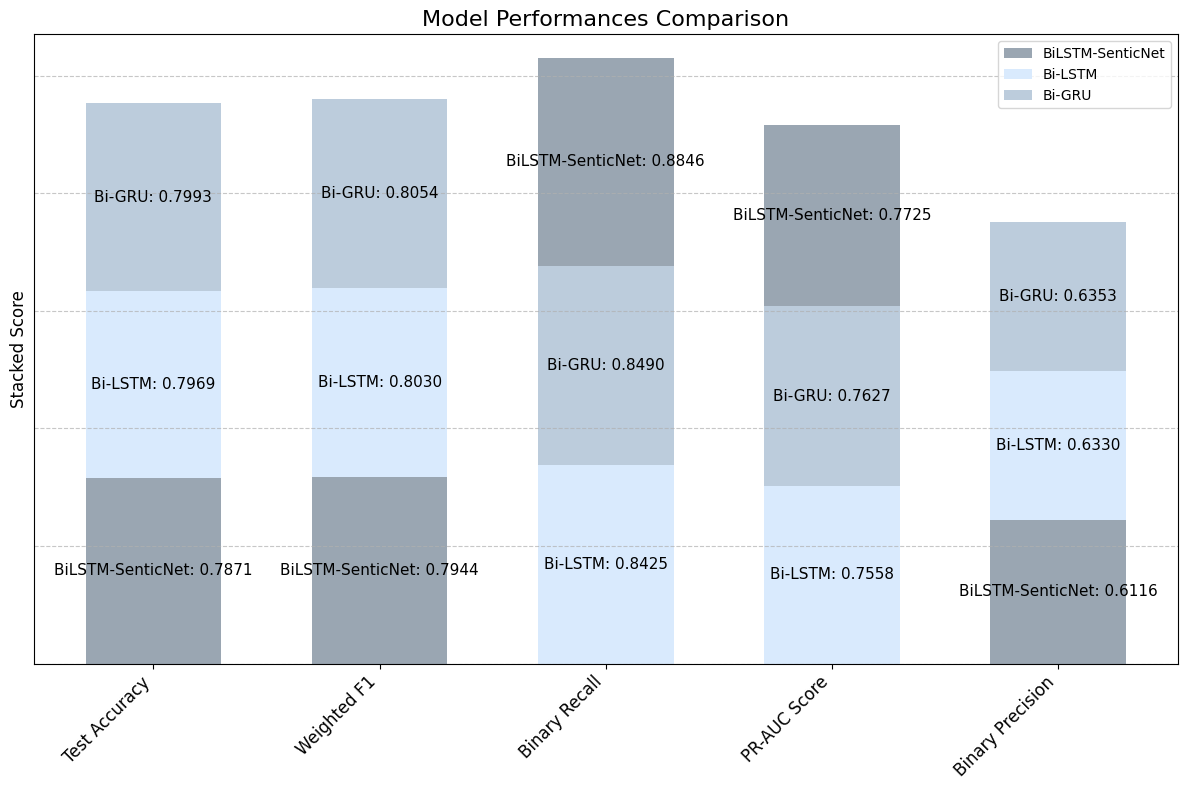

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the models
models = {
    'Bi-LSTM': {
        'Test Accuracy': 0.7969,
        'Weighted F1': 0.8030,
        'Binary Recall': 0.8425,
        'PR-AUC Score': 0.7558,
        'Binary Precision': 0.6330
    },
    'Bi-GRU': {
        'Test Accuracy': 0.7993,
        'Weighted F1': 0.8054,
        'Binary Recall': 0.8490,
        'PR-AUC Score': 0.7627,
        'Binary Precision': 0.6353
    },
    'BiLSTM-SenticNet': {
        'Test Accuracy': 0.7871,
        'Weighted F1': 0.7944,
        'Binary Recall': 0.8846,
        'PR-AUC Score': 0.7725,
        'Binary Precision': 0.6116
    }
}

# Setup
metrics = list(models['Bi-LSTM'].keys())
x_pos = np.arange(len(metrics))
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.6
colors = {
    'Bi-LSTM': '#D9EAFD',
    'Bi-GRU': '#BCCCDC',
    'BiLSTM-SenticNet': '#9AA6B2'
}

max_height = 0

# Plot stacked bars
for i, metric in enumerate(metrics):
    metric_values = [(model, models[model][metric]) for model in models]
    metric_values.sort(key=lambda x: x[1])
    
    bottom = 0
    for model_name, val in metric_values:
        ax.bar(x_pos[i], val, bottom=bottom, width=bar_width, color=colors[model_name], label=model_name if i == 0 else "")
        ax.text(
            x_pos[i], 
            bottom + val / 2, 
            f'{model_name}: {val:.4f}', 
            ha='center', 
            va='center', 
            fontsize=11,
            color='black'
        )
        bottom += val
    max_height = max(max_height, bottom)

# Hide y-axis numbers
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

ax.set_ylabel('Stacked Score', fontsize=12)
ax.set_title('Model Performances Comparison', fontsize=16)
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylim(0, max_height + 0.1)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='upper right', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
